# lib_audio_dsp pipeline designer

In this file you can generate the DSP pipeline of your choice.

Below you will find 3 cells which can be modified and executed to configure, tune and run the desired pipeline.



1. This is the pipeline design cell. Here you must break the DSP pipeline down into threads and use the provided DSP stages to create a pipeline. Running this cell will produce a diagram showing your pipeline. Make sure to capture each stage in your pipeline as a variable, as it will be needed in the next step.
Note that every time the pipeline cell is changed, the app must be regenerated before the tuning stage can work correctly as the stage indices used for communication may have changed.

__radd__
<module>
run_code
run_ast_nodes
run_cell_async
_pseudo_sync_runner
_run_cell
run_cell
run_cell
do_execute
execute_request
execute_request
dispatch_shell
process_one
dispatch_queue
_run
_run_once
run_forever
start
start
launch_instance
<module>
_run_code
_run_module_as_main


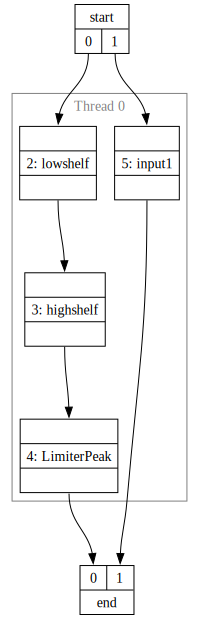

In [2]:
# Pipeline design stage

from audio_dsp.design.pipeline import Pipeline
from audio_dsp.stages import *

p, inputs = Pipeline.begin(2, fs=48000)

# i is a list of pipeline inputs. "lowshelf" is a label for this instance of Biquad.
# The new variable x is the output of the lowshelf Biquad
x = p.stage(Biquad, inputs[0], "lowshelf")

# The output of lowshelf "x" is passed as the input to the
# highshelf. The variable x is reassigned to the outputs of the new Biquad.
x = p.stage(Biquad, x, "highshelf")

# Connect highshelf to the limiter. Labels are optional, however they are required
# if the stage will be tuned later.
x = p.stage(LimiterPeak, x)

i1 = p.stage(Bypass, inputs[1], "input1")

# Finally connect to the output of the pipeline.
p.set_outputs(sum((x, i1)))

p.draw()


2. This is the tuning cell. First time through this can be ignored, but once your pipeline is running on a connected device, this cell can be updated and executed to update each pipeline stage live.

In [ ]:
from audio_dsp.tuning import send_config_to_device, profile_pipeline
from audio_dsp.tuning.transport import XScopeTransport
from time import sleep

# Make a low shelf with a centre frequency of 200 Hz, q of 0.7 and gain of +6 dB
p["lowshelf"].make_lowshelf(200, 0.7, 6)
p["lowshelf"].plot_frequency_response()

# Make a high shelf with a centre frequency of 4000 Hz, q of 0.7 and gain of +6 dB
p["highshelf"].make_highshelf(4000, 0.7, 6)
p["highshelf"].plot_frequency_response()

3. This is the build and run cell. This stage generates an application which uses your pipeline. The tuning parameters set in the previous cell are baked in the application.

In [ ]:
# Build and run
from audio_dsp.design.pipeline import generate_dsp_main
from audio_dsp.design.build_utils import XCommonCMakeHelper

b = XCommonCMakeHelper()
generate_dsp_main(p)

b.configure_build_run()